In [1]:
from google.colab import files
uploaded = files.upload()

Saving HK.csv to HK.csv


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

%matplotlib inline

In [3]:
dataset = pd.read_csv("HK.csv")

hk = pd.DataFrame({"Date":[],"Cases":[]})
hk["Date"] = dataset.iloc[:, 0].values
hk["Cases"] = dataset.iloc[:, 1].values
hk["Cases"] = hk["Cases"].fillna(method='ffill')

dates = hk.Date
cases = hk.Cases

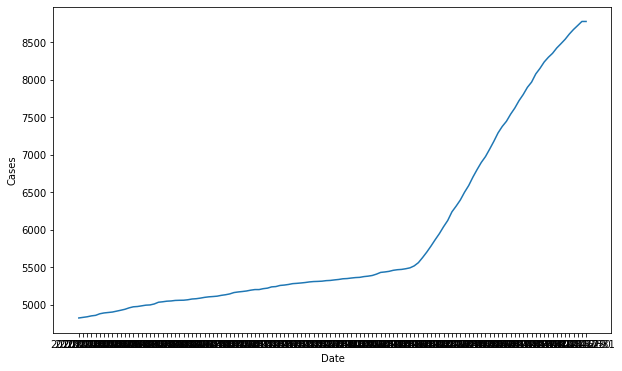

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(dates, cases)
plt.xlabel('Date')
plt.ylabel('Cases')

plt.show()

In [5]:
confirmed = np.array([int(i) for i in cases]).reshape(-1, 1)

confirmed_total = cases.tail(1)

days = np.array([i for i in range(len(dates))]).reshape(-1, 1)

In [7]:
days_future = 1
future_forecast_days = np.array([i for i in range(len(dates) + days_future)]).reshape(-1, 1)
adjusted_dates = future_forecast_days[:-1]

In [8]:
import datetime

start_date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d')
future_forecaste_dates = []

for i in range(len(future_forecast_days)):
  future_forecaste_dates.append((start_date + datetime.timedelta(days=i)).strftime('%Y-%m-%d'))

In [9]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator

In [10]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True, 
                                n_jobs=-1, n_iter=30, verbose=1)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, confirmed, test_size=0.15, shuffle=False)

In [11]:
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  8.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [12]:
svm_confirmed = svm_search.best_estimator_
svm_prediction = svm_confirmed.predict(future_forecast_days)

print(svm_confirmed)
print(svm_prediction)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[5012.91523016 5012.91664268 5012.92653034 5012.95336828 5013.00563164
 5013.09179554 5013.22033514 5013.39972557 5013.63844196 5013.94495946
 5014.32775321 5014.79529833 5015.35606999 5016.01854325 5016.79119341
 5017.68249543 5018.70092458 5019.85495587 5021.1530646  5022.60372581
 5024.21541453 5025.99660606 5027.95577552 5030.10139806 5032.44194878
 5034.98590267 5037.7417349  5040.71792141 5043.92293615 5047.36525453
 5051.05335236 5054.99570394 5059.20078552 5063.67707098 5068.43303586
 5073.47715581 5078.81790567 5084.46376014 5090.42319537 5096.70468367
 5103.31670511 5110.26773084 5117.56623734 5125.22069955 5133.23959303
 5141.63139284 5150.40457333 5159.56760991 5169.12897909 5179.09715236
 5189.48061026 5200.28782404 5211.52726806 5223.20742381 5235.33676017
 5247.92375219 5260.97687805 5274.50460756 5288.51542509 5303.01780117
 5

In [13]:
svm_search_2 = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True, 
                                n_jobs=-1, n_iter=10, verbose=1)

In [14]:
start_date = datetime.datetime.strptime(np.array(dates)[0], '%Y-%m-%d')
last_date = datetime.datetime.strptime(np.array(dates)[-1], '%Y-%m-%d')
pred_date = last_date + datetime.timedelta(days=days_future)

start_date_str = start_date.strftime('%d %b, %Y')
last_date_str = last_date.strftime('%d %b, %Y')
pred_date_str = pred_date.strftime('%d %b, %Y')

In [15]:
ObservationDate_datetime = [datetime.datetime.strptime(i, '%Y-%m-%d') for i in future_forecaste_dates]
ObservationDate_datetime_str = [i.strftime('%d.%m') for i in ObservationDate_datetime]

In [16]:
def two_plots_ini(p1x, p1y, p2x, p2y, title, xlabel, ylabel):
  plt.figure(figsize=(10, 6))
  plt.plot(p1x, p1y)
  plt.plot(p2x, p2y, linestyle='dashed', color='red')
  plt.title(label=title, size=20)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(size=10, rotation = 'vertical')
  plt.yticks(size=10)

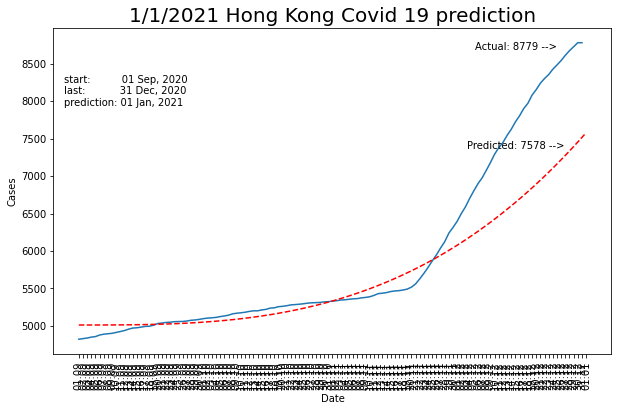

In [27]:
title = '1/1/2021 Hong Kong Covid 19 prediction'
two_plots_ini(adjusted_dates, cases, ObservationDate_datetime_str, svm_prediction, title, 'Date', 'Cases')

plt.figtext(x = 0.14, y = 0.70, s = f'start:          {start_date_str}\nlast:           {last_date_str} \nprediction: {pred_date_str}')
plt.figtext(x = 0.71, y = 0.83, s = f'Actual: {int(np.array(cases)[-1])} -->')
plt.figtext(x = 0.70, y = 0.60, s = f'Predicted: {int(round(svm_prediction[-1]))} -->')

plt.show()